In [64]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import pandas as pd
import seaborn as sns
import tensorflow as tf
import sklearn
import warnings

In [65]:
df = pd.read_csv('../Participants_Data_WSMLC/train.csv')
df_test = pd.read_csv('../Participants_Data_WSMLC/test.csv')

In [66]:
df.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [67]:
df.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [68]:
df.describe()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,2013.500274,6.523549,15.727820,11.500000,15.000000,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.903732,188.877796,2.262871,0.740433
std,2.871908,3.448543,8.799349,6.922206,15.000043,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,1.546979,99.014733,1.281902,6.575655
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,0.122000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,1.534000,97.400000,1.300000,0.000000
50%,2013.500000,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.866000,200.000000,2.000000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,30.000000,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.223000,272.000000,3.000000,0.000000
max,2018.000000,12.000000,31.000000,23.000000,30.000000,565.000000,1040.000000,1063.000000,10.000000,26.900000,40.000000,1024.000000,100.000000,171.550000,7.700000,360.000000,12.900000,100.000000


In [69]:
df.shape

(175296, 18)

Calculated GHI = Clearsky-DNI*cos(Solar-Zenith-Angle) + Clearsky-DHI

In [70]:
df['GHI_cal'] = df['Clearsky DNI']*np.cos(np.radians(df['Solar Zenith Angle'])) + df['Clearsky DHI']

In [71]:
df.head(49)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,GHI_cal
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,0.000000
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,0.000000
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,0.000000
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,0.000000
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,0.000000
5,2009,1,1,2,30,0,0,0,4,0.0,3.0,1010,82.02,137.48,0.476,350.0,3.2,0,0.000000
6,2009,1,1,3,0,0,0,0,4,0.0,3.0,1010,78.12,143.85,0.477,359.8,3.5,0,0.000000
7,2009,1,1,3,30,0,0,0,1,0.0,2.0,1010,83.87,150.17,0.481,359.8,3.1,0,0.000000
8,2009,1,1,4,0,0,0,0,4,0.0,2.0,1010,82.62,156.39,0.486,8.3,2.8,0,0.000000
9,2009,1,1,4,30,0,0,0,4,0.0,1.0,1010,88.74,162.35,0.490,8.3,2.5,0,0.000000


In [72]:
df.describe()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,GHI_cal
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,2013.500274,6.523549,15.727820,11.500000,15.000000,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.903732,188.877796,2.262871,0.740433,254.263976
std,2.871908,3.448543,8.799349,6.922206,15.000043,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,1.546979,99.014733,1.281902,6.575655,327.572386
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,0.122000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,1.534000,97.400000,1.300000,0.000000,0.000000
50%,2013.500000,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.866000,200.000000,2.000000,0.000000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,30.000000,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.223000,272.000000,3.000000,0.000000,535.258754
max,2018.000000,12.000000,31.000000,23.000000,30.000000,565.000000,1040.000000,1063.000000,10.000000,26.900000,40.000000,1024.000000,100.000000,171.550000,7.700000,360.000000,12.900000,100.000000,1062.983507


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

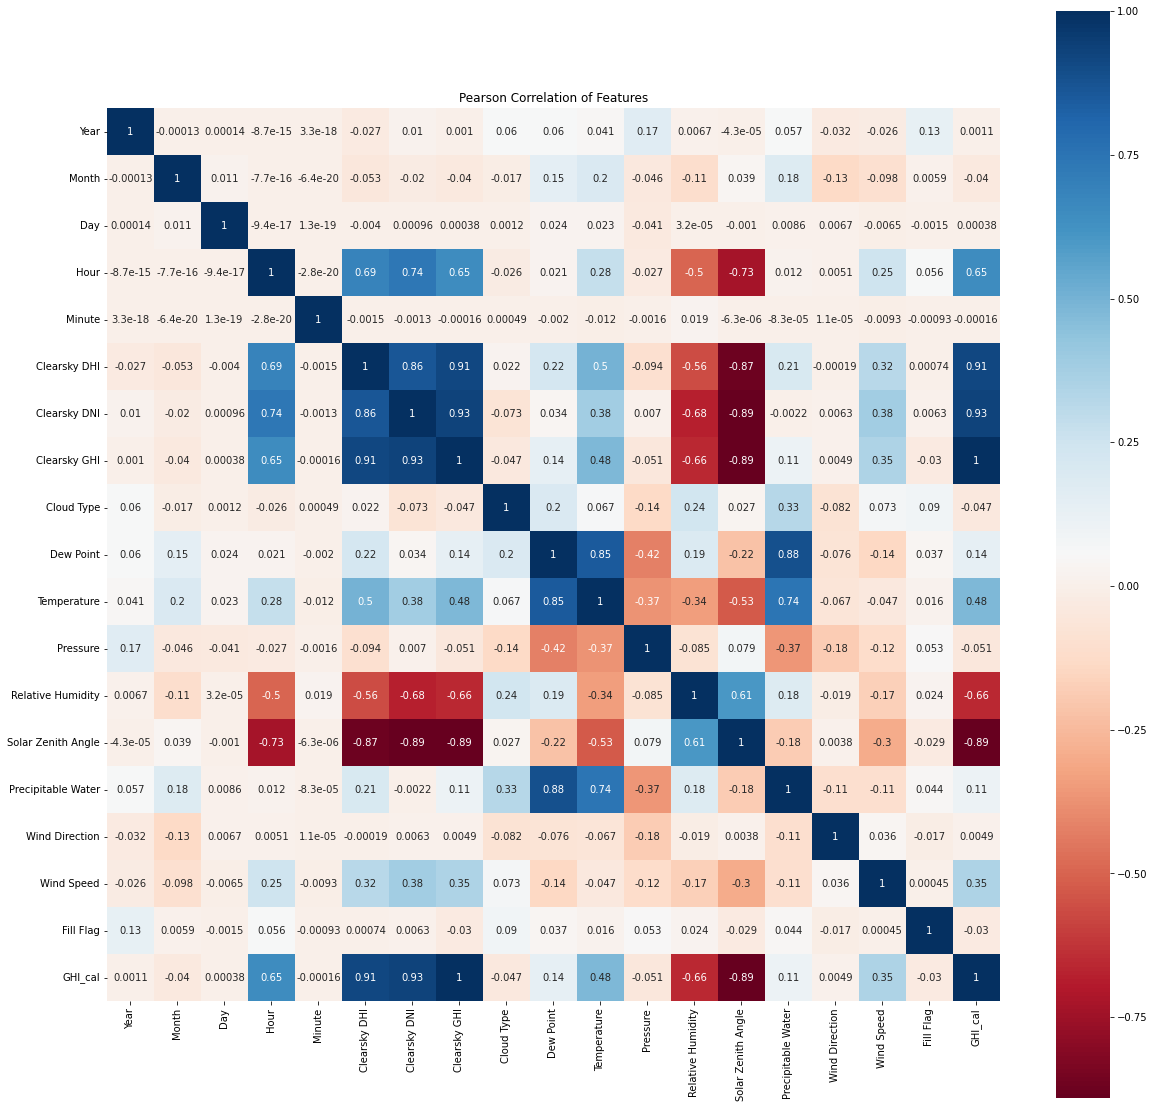

In [73]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features')
sns.heatmap(df.corr(), square=True, cmap=colormap, annot=True)

So  GHI, DNI, DHI have high correlation with Relative Humidity & Solar Zenith Angle. 
Moderate Correlation with Hour, Temperature & Wind Speed. 
Temperature has high correlation with Precipitable Water. 
Precipitable Water has High correlation with Dew Point.

In [74]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

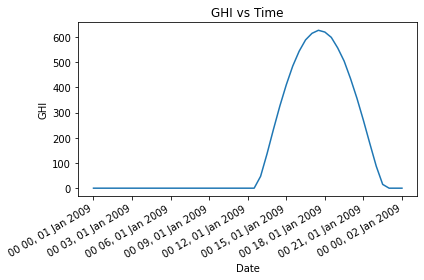

In [75]:
plt.plot(df['Date'][0:49], df['Clearsky GHI'][0:49])
plt.title('GHI vs Time')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%M %H, %d %b %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.show()

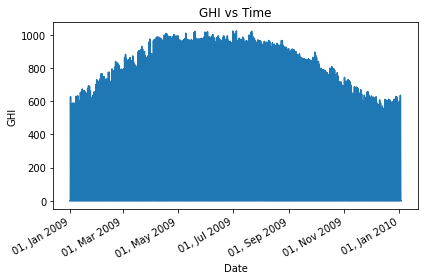

In [76]:
plt.plot(df['Date'][0:49*30*12], df['Clearsky GHI'][0:49*30*12])
plt.title('GHI vs Time')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d, %b %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.show()

In [77]:
df

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,GHI_cal,Date
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,0.000000,2009-01-01 00:00:00
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,0.000000,2009-01-01 00:30:00
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,0.000000,2009-01-01 01:00:00
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,0.000000,2009-01-01 01:30:00
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,0.000000,2009-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175291,2018,12,31,21,30,51,555,168,4,19.4,20.8,1008,91.77,77.86,3.700,204.0,3.5,100,167.717129,2018-12-31 21:30:00
175292,2018,12,31,22,0,37,388,84,4,19.1,20.1,1008,93.88,83.03,3.800,209.0,3.2,100,84.083657,2018-12-31 22:00:00
175293,2018,12,31,22,30,15,115,18,7,19.1,19.6,1008,96.83,88.32,3.800,208.0,2.6,57,18.371493,2018-12-31 22:30:00
175294,2018,12,31,23,0,0,0,0,7,18.7,19.2,1009,96.84,94.34,3.700,206.0,2.1,0,0.000000,2018-12-31 23:00:00


In [78]:
df.drop(columns = ['Fill Flag', 'GHI_cal', 'Cloud Type', 'Date'], inplace=True)

In [79]:
df.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed
0,2009,1,1,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1
1,2009,1,1,0,30,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1
2,2009,1,1,1,0,0,0,0,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2
3,2009,1,1,1,30,0,0,0,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1
4,2009,1,1,2,0,0,0,0,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0


In [80]:
df.shape

(175296, 16)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [82]:
models = []
models.append(('LinearRegressor', LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('XGBRegressor', XGBRegressor()))

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
X = df.drop(columns=['Clearsky GHI'])
y = df['Clearsky GHI']

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=101)

In [86]:
for name, model in models:
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    valid_pred = model.predict(x_valid)
    print(name)
    print(f"Train score = {model.score(x_train, y_train)}\tTrain MSE = {mean_squared_error(train_pred, y_train)}")
    print(f"Validation score = {model.score(x_valid, y_valid)}\tValidation MSE = {mean_squared_error(valid_pred, y_valid)}")
    print()

LinearRegressor
Train score = 0.92759859240347	Train MSE = 7759.37318368004
Validation score = 0.9280675238139453	Validation MSE = 7787.4598322484435

DecisionTreeRegressor
Train score = 1.0	Train MSE = 0.0
Validation score = 0.9998356937712173	Validation MSE = 17.787906446092414

ExtraTreesRegressor
Train score = 0.9999999999994943	Train MSE = 5.4194358081991615e-08
Validation score = 0.9999818020329758	Validation MSE = 1.9701245493439825

XGBRegressor
Train score = 0.9999585304397899	Train MSE = 4.444358253731961
Validation score = 0.9999437376832364	Validation MSE = 6.090997489545794



In [87]:
X1 = df.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])
y1 = df['Clearsky GHI']

X2 = df.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])
y2 = df['Clearsky DHI']

X3 = df.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])
y3 = df['Clearsky DNI']

In [88]:
x1_train, x1_valid, y1_train, y1_valid = train_test_split(X1, y1, test_size=0.10, random_state=101)

x2_train, x2_valid, y2_train, y2_valid = train_test_split(X2, y2, test_size=0.10, random_state=101)

x3_train, x3_valid, y3_train, y3_valid = train_test_split(X3, y3, test_size=0.10, random_state=101)

In [89]:
model1 = XGBRegressor(learning_rate = 0.4, max_depth = 9, n_estimators = 1000, reg_alpha = 0)
model1.fit(x1_train, y1_train)

model2 = XGBRegressor(learning_rate = 0.4, max_depth = 9, n_estimators = 1000, reg_alpha = 0)
model2.fit(x2_train, y2_train)

model3 = XGBRegressor(learning_rate = 0.4, max_depth = 9, n_estimators = 1000, reg_alpha = 0)
model3.fit(x3_train, y3_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.4, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [90]:
train_pred = model1.predict(x1_train)
valid_pred = model1.predict(x1_valid)
for value in train_pred:
    if value < 0:
        value = 0
for value in valid_pred:
    if value < 0:
        value = 0
print('Clearsky GHI')
print(f"Train score = {model1.score(x1_train, y1_train)}\tTrain MSE = {mean_squared_error(train_pred, y1_train)}")
print(f"Validation score = {model1.score(x1_valid, y1_valid)}\tValidation MSE = {mean_squared_error(valid_pred, y1_valid)}")

Clearsky GHI
Train score = 0.9999994488076189	Train MSE = 0.059166218101225035
Validation score = 0.9998523648952599	Validation MSE = 15.917360738691967


In [91]:
train_pred = model2.predict(x2_train)
valid_pred = model2.predict(x2_valid)
for value in train_pred:
    if value < 0:
        value = 0
for value in valid_pred:
    if value < 0:
        value = 0
print('Clearsky DHI')
print(f"Train score = {model2.score(x2_train, y2_train)}\tTrain MSE = {mean_squared_error(train_pred, y2_train)}")
print(f"Validation score = {model2.score(x2_valid, y2_valid)}\tValidation MSE = {mean_squared_error(valid_pred, y2_valid)}")

Clearsky DHI
Train score = 0.9999608550501403	Train MSE = 0.16141196886294873
Validation score = 0.9880099005329113	Validation MSE = 49.24248136106363


In [92]:
train_pred = model3.predict(x3_train)
valid_pred = model3.predict(x3_valid)
for value in train_pred:
    if value < 0:
        value = 0
for value in valid_pred:
    if value < 0:
        value = 0
print((valid_pred.any() < 0))
print('Clearsky DNI')
print(f"Train score = {model3.score(x3_train, y3_train)}\tTrain MSE = {mean_squared_error(train_pred, y3_train)}")
print(f"Validation score = {model3.score(x3_valid, y3_valid)}\tValidation MSE = {mean_squared_error(valid_pred, y3_valid)}")

False
Clearsky DNI
Train score = 0.9999854944761596	Train MSE = 1.9851993858194816
Validation score = 0.996583577594131	Validation MSE = 469.7150649121492


In [93]:
x_test = df_test.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])

In [94]:
x_test = x_test[x1_train.columns]

In [95]:
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)

In [96]:
submission = pd.DataFrame()
submission['Clearsky DHI'] = pred2
submission['Clearsky DNI'] = pred3
submission['Clearsky GHI'] = pred1

In [97]:
submission.loc[ submission['Clearsky DHI'] < 0, 'Clearksy DHI'] = 0
submission.loc[ submission['Clearsky DNI'] < 0, 'Clearsky DNI'] = 0
submission.loc[ submission['Clearsky GHI'] < 0, 'Clearsky GHI'] = 0

In [98]:
submission['Clearsky DHI'] = submission['Clearsky DHI'].astype("int")
submission['Clearsky DNI'] = submission['Clearsky DNI'].astype("int")
submission['Clearsky GHI'] = submission['Clearsky GHI'].astype("int")

In [99]:
submission.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Clearksy DHI
0,1,0,0,NaN
1,3,2,0,NaN
2,0,4,0,NaN
3,-1,3,0,0.0
4,0,0,0,0.0


In [100]:
submission.to_csv('submission.csv', index=False)